<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]  # Random image of a kitten

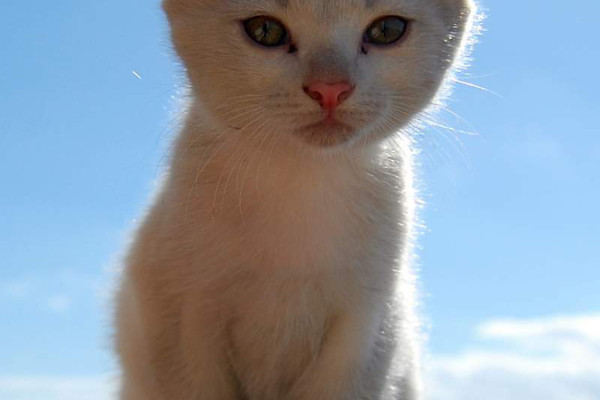

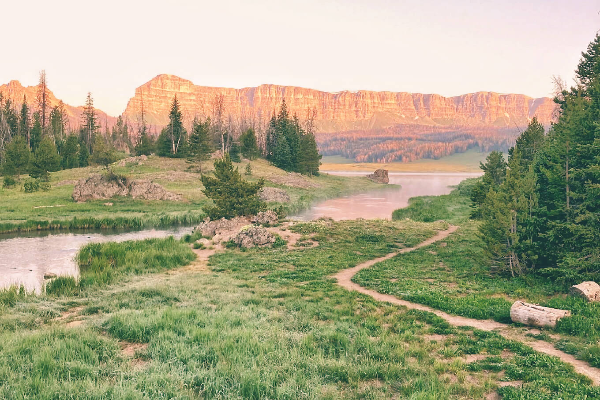

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (600, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    return gray

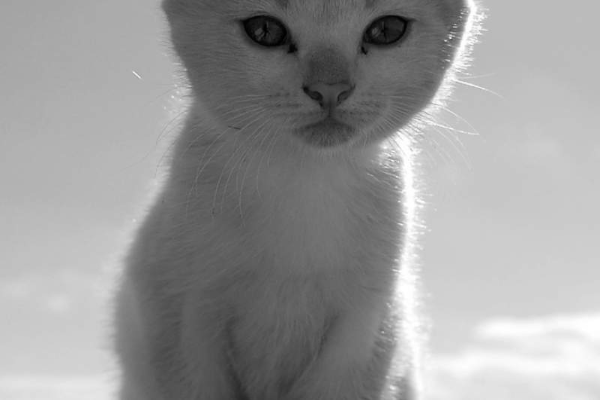

In [ ]:
gray = grayscale(images[0])

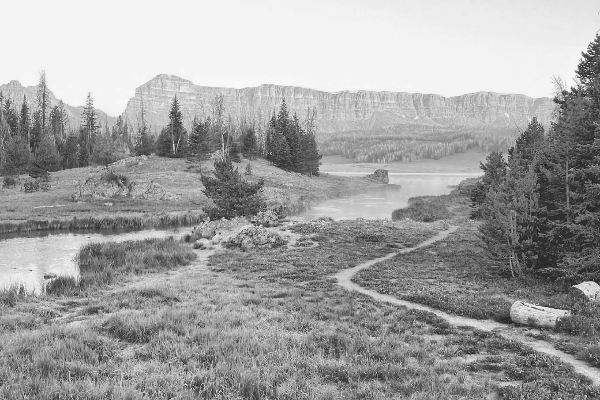

In [ ]:
gray2 = grayscale(images[1])

## 2. Add some noise to the image and save it as second image
### Adding salt and pepper noise to first quadrant of the image

In [ ]:
import random

In [ ]:
def random_noise(image, n, noiseval): # n is size of
  noisy = image.copy()
  r, c = image.shape
  r1 = random.randint(0, (int)((r-n-1)/2))
  c1 = random.randint(0, (int)((c-n-1)/2))
  for i in range(r1, r1+n):
    for j in range(c1, c1+n):
      noisy[i][j] = noiseval
  return noisy


In [ ]:
def random_noise_multiple(image, n, t):
  noisy = image.copy()
  for i in range(t):
    noiseval = random.randint(0, 255)
    noisy = random_noise(noisy, n, noiseval)
  cv2_imshow(noisy)
  return noisy

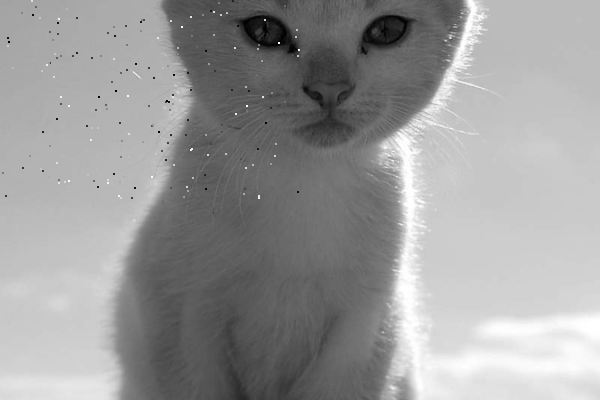

In [ ]:
gray_noisy = random_noise_multiple(gray, 2, 200)

## 3. Apply image fusion on the input image and noisy image
# Pixel by pixel approach: F(i,j) = max(A(i,j),B(i,j))
### The pepper noise, i.e., the black spots have been eliminated but the salt noise, i.e., the white spots still remain. This is intuitive as image fusion always selects the max pixel value.

In [ ]:
def pixelimagefusion(A, B):
  fused = A.copy()
  ra, ca = A.shape
  rb, cb = B.shape
  if(ra != rb or ca != cb):
    return False
  for i in range(ra):
    for j in range(ca):
      fused[i][j] = max(A[i][j], B[i][j])
  cv2_imshow(fused)
  return fused

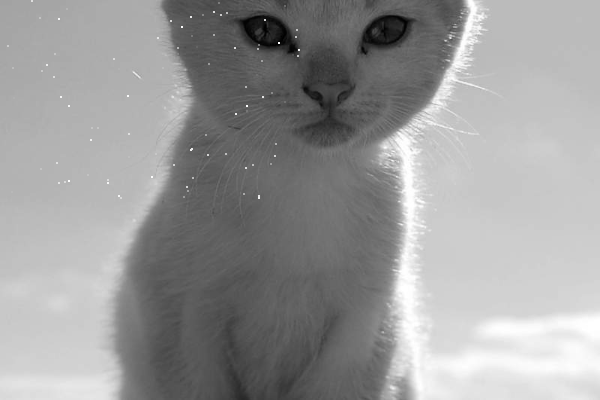

In [ ]:
O1 = pixelimagefusion(gray, gray_noisy)

## 4. Save the output as O1
### Saved

## 5. Apply image addition on the input image and noisy image

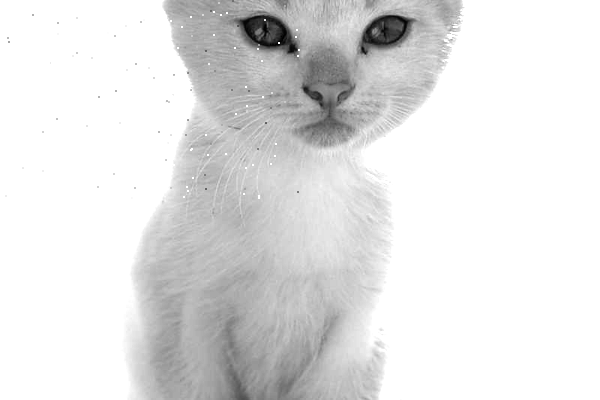

In [ ]:
O2 = cv2.add(gray, gray_noisy)
cv2_imshow(O2)

## 6. Save the output as O2
### Saved

## 7. Compare the percentage of similarity between O1,O2 using any metric
https://www.geeksforgeeks.org/measure-similarity-between-images-using-python-opencv/

In [ ]:
# test image
histogram = cv2.calcHist([O1], [0],
                         None, [256], [0, 256])

# data1 image
histogram1 = cv2.calcHist([O2], [0],
                          None, [256], [0, 256])

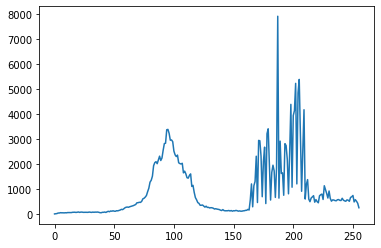

In [ ]:
plt.plot(histogram)
plt.show()

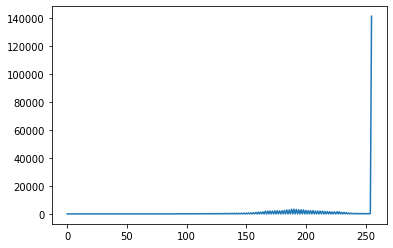

In [ ]:
plt.plot(histogram1)
plt.show()

In [ ]:
def percent_similarity(h1, h2):
  x = 0
  for i in range(len(h1)):
    if(round((int)(h1[i]),1) == round((int)(h2[i]),1)):
      x += 1
  percent = (x/(len(h1))) * 100
  return percent

In [ ]:
percent_similarity(histogram, histogram1)

0.390625